Cloning Darknet from AlexeyAB github repository

In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


Buid Darknet

In [5]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

Getting Pre-Trained weights for trail.

In [ ]:
# Getting pretrained weights
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

Defining Helper function 

In [11]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [10]:
# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: ignored

Mount Google Drive 

In [12]:
# This mounts Google Drive 
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [13]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive


'Colab Notebooks'		'IN21S14037032  scoreCard.pdf'
'EE21S34037019  scoreCard.pdf'	'IN22S44045070  scoreCard.pdf'
'EE22S24045098  scoreCard.pdf'	 scrach
 Finalized_codeYOLOv4.ipynb	 yolo
 images


In [14]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


Testing street.jpg with pretrained weights

In [ ]:
# !./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/images/street.jpg
# imShow('predictions.jpg')

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
# !cp predictions.jpg /mydrive/images/detection1.jpg

Getting Datasets and Labels required for training 

In [ ]:
# this is where my zip(images with labels) is stored (I created a yolo folder where I will get my required files from)
# !ls /mydrive/yolo

In [ ]:
# copy the .zip file into the root directory of cloud VM
# !cp /mydrive/yolo/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
# !unzip ../obj.zip -d data/

xtra

Saving config file from Darknet to Google Drive to modify and use it for custom training

In [ ]:
# download cfg to google drive and change its name
# !cp cfg/yolov4.cfg /mydrive/yolo/yolo_custom.cfg

endXtra

Getting cfg and classes file suited for custom training

In [15]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolo/yolo_custom.cfg ./cfg


In [16]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolo/obj.names ./data
!cp /mydrive/yolo/obj.data  ./data


generate.py is used for feeding test image paths to train.txt

In [17]:
# upload the generate_train.py script to cloud VM from Google Drive
# !cp /mydrive/yolo/generate_train.py ./


In [ ]:
# !python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
# !ls data/

Getting Convolutional Layers of darknet53

In [ ]:
# upload pretrained convolutional layer weights
# !wget http://pjreddie.com/media/files/darknet53.conv.74

Training weights for custom detector

In [ ]:
# train your custom detector
# !./darknet detector train data/obj.data cfg/yolo_custom.cfg darknet53.conv.74 -dont_show

In [ ]:
# imShow('chart.png')

Continue Training custom detector from last saved weights

In [ ]:
### Training of weights ###
# !./darknet detector train data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights -dont_show


# **Performing Custom YOLOv4 detection on Images**

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv   

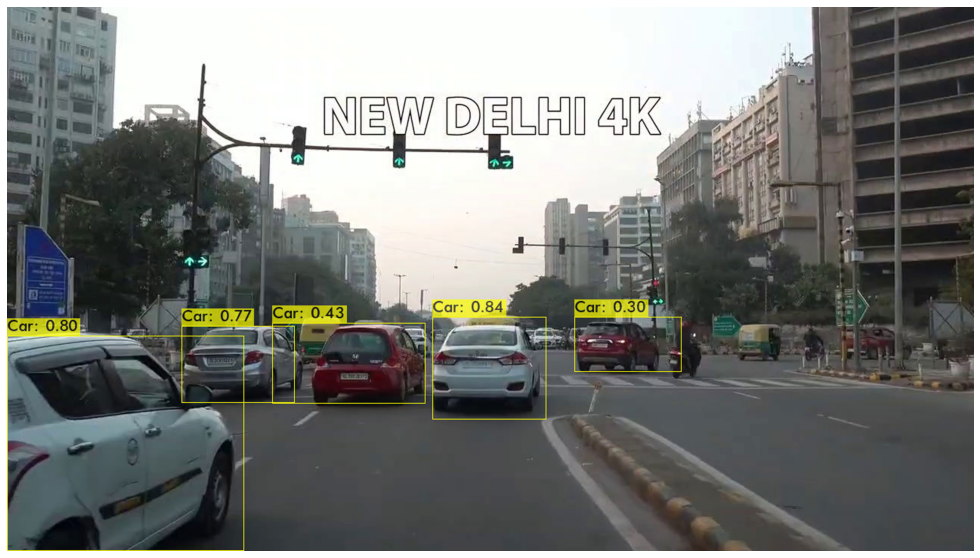

In [19]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights /mydrive/images/street.jpg
imShow('predictions.jpg')

# **Performing Custom YOLOv4 Detection on Videos**

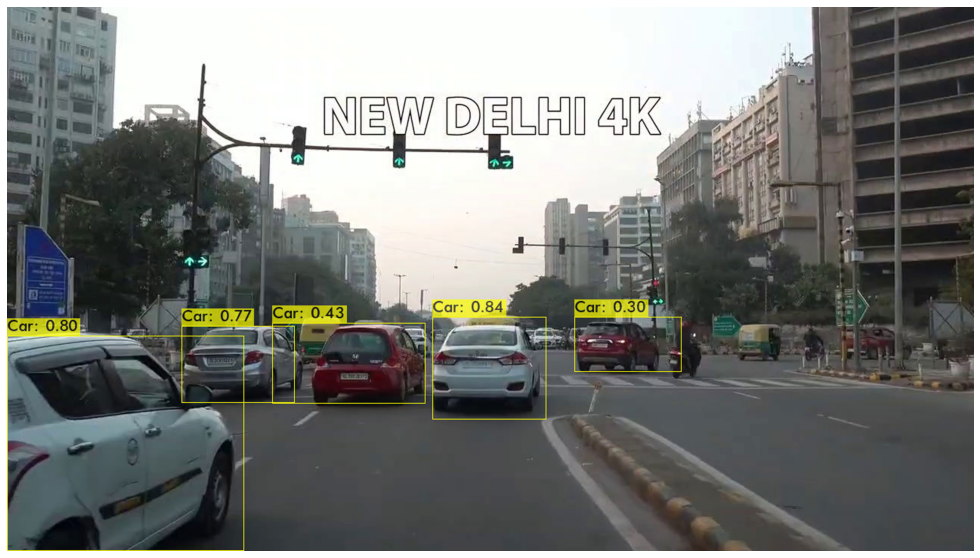

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 co

In [21]:
# !./darknet detector test data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights /mydrive/images/street.jpg
imShow('predictions.jpg')
!./darknet detector demo data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights -dont_show /mydrive/images/gdrive1.mp4 -i 0 -out_filename /mydrive/images/results2.avi

In [ ]:
# !./darknet detector test data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights /mydrive/images/street.jpg
imShow('predictions.jpg')
!./darknet detector demo data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights -dont_show /mydrive/images/gdrive2.mp4 -i 0 -out_filename /mydrive/images/results3.avi

In [ ]:
# !./darknet detector test data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights /mydrive/images/street.jpg
imShow('predictions.jpg')
!./darknet detector demo data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights -dont_show /mydrive/images/gdrive3.avi -i 0 -out_filename /mydrive/images/results4.avi

In [ ]:
# !./darknet detector test data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights /mydrive/images/street.jpg
imShow('predictions.jpg')
!./darknet detector demo data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights -dont_show /mydrive/images/test5_p1.mp4 -i 0 -out_filename /mydrive/images/results5.avi

In [ ]:
# !./darknet detector test data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights /mydrive/images/street.jpg
imShow('predictions.jpg')
!./darknet detector demo data/obj.data cfg/yolo_custom.cfg /mydrive/yolo/backup/yolo_custom_last.weights -dont_show /mydrive/images/test5_p1.mp4 -i 0 -out_filename /mydrive/images/results7.avi